<a href="https://colab.research.google.com/github/SeongHyeon9912/DAP203/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%98%EB%B0%8D_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8%EA%B2%B0%EA%B3%BC_201811474%EC%A1%B0%EC%84%B1%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

데이터분석프로그래밍 프로젝트 결과 제출_201811474 조성현

본래 계획했던 프로젝트는 병원 혹은 외부로부터 환자의 단백질,유전자 발현량 데이터를 받아 질병과 발현량의 상관관계를 밝히는 것이었습니다.

하지만 현재 데이터를 받을수 있는곳이 없어 'seaborn' 라이브러리의 'penguins' 데이터를 환자의 데이터로 가정하고 분석 결과를 제출하겠습니다.  

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

df = sns.load_dataset('penguins') # 환자의 데이터 불러오기.

# 환자의 데이터를 csv,excel 형식 파일으로 받을경우
# pandas의 pd.read_csv() 혹은 pd.read_excel()을 이용합니다.

df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


'Adelie' = 정상인(Normal)

'Chinstrap' = 초기 폐암 환자(Early Stage Lung Cancer)

'Gentoo' = 말기 폐암 환자(Terminal Lung Cancer)

라고 가정하겠습니다.

'bill_lenth_mm', 'bill_depth_mm', 'flipper_length_mm'은 각각 폐암 발병시 증가할것으로 추정되는 Protein A,B,C의 발현량 데이터 라고 가정하겠습니다.

In [28]:
df.rename(columns={'species':'Diagnosis'}, inplace=True)
df.rename(columns={'bill_length_mm':'Protein_A'}, inplace=True)
df.rename(columns={'bill_depth_mm':'Protein_B'}, inplace=True)
df.rename(columns={'flipper_length_mm':'Protein_C'}, inplace=True)  # 열 이름 변경

df['Diagnosis'].replace('Adelie', 'Normal', inplace=True)
df['Diagnosis'].replace('Chinstrap', 'ESLC', inplace=True)
df['Diagnosis'].replace('Gentoo', 'TLC', inplace=True) # Value 이름 변경

columns = ['Diagnosis', 'Protein_A', 'Protein_B', 'Protein_C']
df = df[columns] # 필요한 열만 사용

df = df.dropna()

df

,Diagnosis,Protein_A,Protein_B,Protein_C
0,Normal,39.1,18.7,181.0
1,Normal,39.5,17.4,186.0
2,Normal,40.3,18.0,195.0
4,Normal,36.7,19.3,193.0
5,Normal,39.3,20.6,190.0
...,...,...,...,...
338,TLC,47.2,13.7,214.0
340,TLC,46.8,14.3,215.0
341,TLC,50.4,15.7,222.0
342,TLC,45.2,14.8,212.0


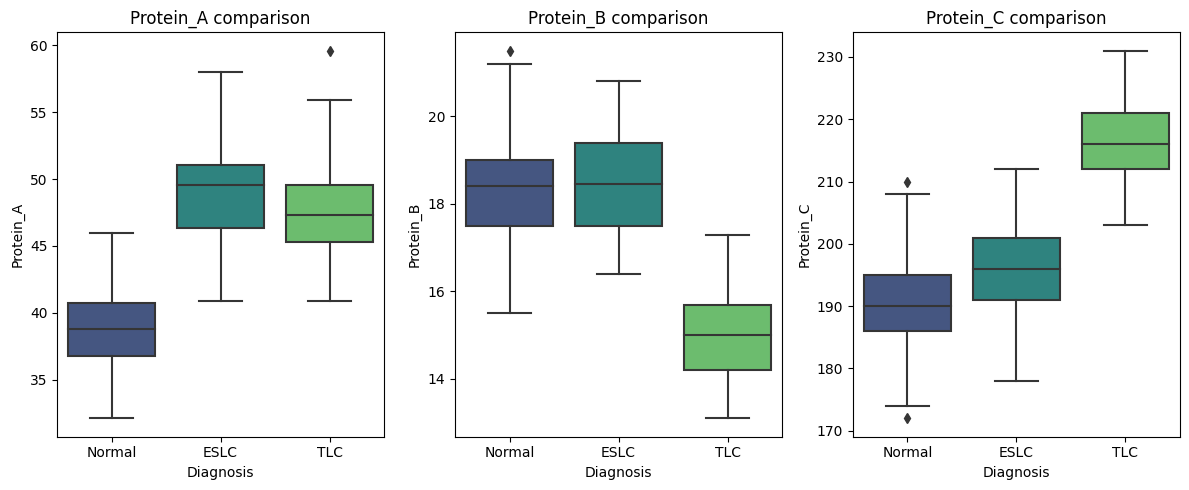

In [38]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='Diagnosis', y='Protein_A', data=df, palette='viridis')
plt.title('Protein_A comparison')

plt.subplot(1, 3, 2)
sns.boxplot(x='Diagnosis', y='Protein_B', data=df, palette='viridis')
plt.title('Protein_B comparison')

plt.subplot(1, 3, 3)
sns.boxplot(x='Diagnosis', y='Protein_C', data=df, palette='viridis')
plt.title('Protein_C comparison')

plt.tight_layout()
plt.show() # 데이터를 boxplot 형식으로 시각화 하여 차이 비교

In [52]:
# Protein_A의 t-test
normal_A = df[df['Diagnosis'] == 'Normal']['Protein_A']
eslc_A = df[df['Diagnosis'] == 'ESLC']['Protein_A']
tlc_A = df[df['Diagnosis'] == 'TLC']['Protein_A']

t_statistic, p_value = ttest_ind(normal_A, eslc_A)

a = 0.01
if p_value < a:
    print("Protein_A의 Normal 그룹과 ESLC 그룹 간에는 유의한 차이가 있습니다.")
else:
    print("Protein_A의 Normal 그룹과 ESLC 그룹 간에는 유의한 차이가 없습니다.")

t_statistic, p_value = ttest_ind(tlc_A, eslc_A)

if p_value < a:
    print("Protein_A의 TLC 그룹과 ESLC 그룹 간에는 유의한 차이가 있습니다.")
else:
    print("Protein_A의 TLC 그룹과 ESLC 그룹 간에는 유의한 차이가 없습니다.")


# Protein_B의 t-test
normal_B = df[df['Diagnosis'] == 'Normal']['Protein_B']
eslc_B = df[df['Diagnosis'] == 'ESLC']['Protein_B']
tlc_B = df[df['Diagnosis'] == 'TLC']['Protein_B']

t_statistic, p_value = ttest_ind(normal_B, eslc_B)

if p_value < a:
    print("Protein_B의 Normal 그룹과 ESLC 그룹 간에는 유의한 차이가 있습니다.")
else:
    print("Protein_B의 Normal 그룹과 ESLC 그룹 간에는 유의한 차이가 없습니다.")

t_statistic, p_value = ttest_ind(tlc_B, eslc_B)

if p_value < a:
    print("Protein_B의 TLC 그룹과 ESLC 그룹 간에는 유의한 차이가 있습니다.")
else:
    print("Protein_B의 TLC 그룹과 ESLC 그룹 간에는 유의한 차이가 없습니다.")


# Protein_C의 t-test
normal_C = df[df['Diagnosis'] == 'Normal']['Protein_C']
eslc_C = df[df['Diagnosis'] == 'ESLC']['Protein_C']
tlc_C = df[df['Diagnosis'] == 'TLC']['Protein_C']

t_statistic, p_value = ttest_ind(normal_C, eslc_C)

if p_value < a:
    print("Protein_C의 Normal 그룹과 ESLC 그룹 간에는 유의한 차이가 있습니다.")
else:
    print("Protein_C의 Normal 그룹과 ESLC 그룹 간에는 유의한 차이가 없습니다.")

t_statistic, p_value = ttest_ind(tlc_C, eslc_C)

if p_value < a:
    print("Protein_C의 TLC 그룹과 ESLC 그룹 간에는 유의한 차이가 있습니다.")
else:
    print("Protein_C의 TLC 그룹과 ESLC 그룹 간에는 유의한 차이가 없습니다.")

t_statistic, p_value = ttest_ind(normal_C, tlc_C)

if p_value < a:
    print("Protein_C의 Normal 그룹과 TLC 그룹 간에는 유의한 차이가 있습니다.")
else:
    print("Protein_C의 Normal 그룹과 TLC 그룹 간에는 유의한 차이가 없습니다.")

Protein_A의 Normal 그룹과 ESLC 그룹 간에는 유의한 차이가 있습니다.
Protein_A의 TLC 그룹과 ESLC 그룹 간에는 유의한 차이가 있습니다.
Protein_B의 Normal 그룹과 ESLC 그룹 간에는 유의한 차이가 없습니다.
Protein_B의 TLC 그룹과 ESLC 그룹 간에는 유의한 차이가 있습니다.
Protein_C의 Normal 그룹과 ESLC 그룹 간에는 유의한 차이가 있습니다.
Protein_C의 TLC 그룹과 ESLC 그룹 간에는 유의한 차이가 있습니다.
Protein_C의 Normal 그룹과 TLC 그룹 간에는 유의한 차이가 있습니다.


데이터 분석 결과

Protein_A: 폐암 발병시 증가하는 단백질으로 볼수 있으나, 말기 환자에게선 감소되는 모습을 보입니다. 시기에 따른 상관관계에 대한 추가 연구가 필요합니다.

Protein_B: 정상인 그룹과 초기 폐암 환자 데이터 간의 유의한 차이는 없고, 말기 환자에게서 유의하게 감소하는것을 확인할수 있습니다. 폐암 말기 환자에게서 감소되는 단백질임을 알 수 있습니다.

Protein_C: 폐암 발병시 유의하게 증가한것을 확인할수 있습니다. 암 진행시기에 따라서 발현량이 같이 증가하는것을 알 수 있습니다.


데이터 분석을 통해서 폐암과 관련 단백질 간의 상관관계를 확인할수 있습니다.

이를 의료 진단법에 이용할 수 있고, 생물학적 추가 연구를 통해 치료에 이용되는데 도움을 줄수 있습니다.